In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv',delimiter = ";")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


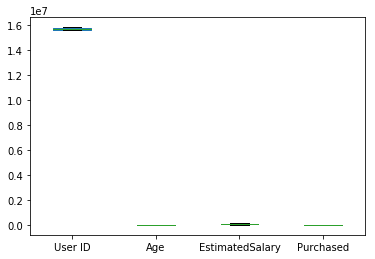

In [4]:
dataset.plot.box()

In [5]:
dataset = dataset.drop("User ID",axis=1)

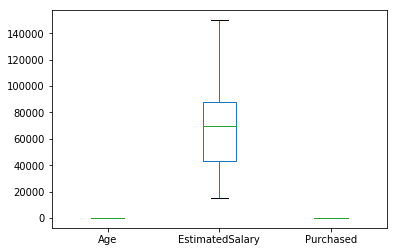

In [6]:
dataset.head()
dataset.plot.box()

In [7]:
X = dataset.iloc[:,:-1]
Y= dataset.iloc[:,-1]
Y = Y.values.reshape(-1,1)
Y = pd.DataFrame(Y)

In [8]:
X.shape,Y.shape

((400, 3), (400, 1))

In [9]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [10]:
X_Gender = X["Gender"]

In [11]:
X = X.drop("Gender",axis=1)

In [12]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
from sklearn.preprocessing import MinMaxScaler
X_s = MinMaxScaler()
X = X_s.fit_transform(X)


c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
X[:5]

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185]])

{'whiskers': [<matplotlib.lines.Line2D at 0xcb70c676d8>,
 'caps': [<matplotlib.lines.Line2D at 0xcb70c67d30>,
 'boxes': [<matplotlib.lines.Line2D at 0xcb70c67320>,
 'medians': [<matplotlib.lines.Line2D at 0xcb70c75400>,
 'fliers': [<matplotlib.lines.Line2D at 0xcb70c75748>,
 'means': []}

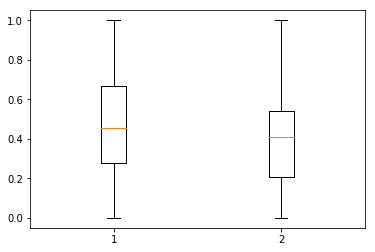

In [15]:
plt.boxplot(X)


In [16]:
X = pd.DataFrame(X)

In [17]:
X.head()

,0,1
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852


In [18]:
X.columns = ["Age","EstimatedSalary"]

In [19]:
X.head()

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852


In [20]:
X = pd.concat([X,X_Gender],axis=1)

In [21]:
X.head()

,Age,EstimatedSalary,Gender
0,0.023810,0.029630,Male
1,0.404762,0.037037,Male
2,0.190476,0.207407,Female
3,0.214286,0.311111,Female
4,0.023810,0.451852,Male


In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE1 = LabelEncoder()
X.Gender = LE1.fit_transform(X.Gender)

In [23]:
X.head()

,Age,EstimatedSalary,Gender
0,0.023810,0.029630,1
1,0.404762,0.037037,1
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,1


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,random_state=100)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [26]:
model = LogisticRegression()
model.fit(X_train,Y_train)
predicted_classes = model.predict(X_train)
predicted_classes_test = model.predict(X_test)


c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
accuracy_score(Y_train,predicted_classes),accuracy_score(Y_test,predicted_classes_test)


(0.834375, 0.825)

In [28]:
X.head()

,Age,EstimatedSalary,Gender
0,0.023810,0.029630,1
1,0.404762,0.037037,1
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,1


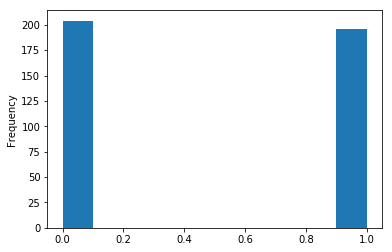

In [29]:
X.Gender.plot(kind="hist")

In [30]:
Y[0].value_counts()

0    257
1    143
Name: 0, dtype: int64

In [31]:
X_train["Gender"].value_counts()

1    160
0    160
Name: Gender, dtype: int64

In [32]:
X_test["Gender"].value_counts()

0    44
1    36
Name: Gender, dtype: int64

In [33]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,Y_train)
Y_predict_knn_test = Knn.predict(X_test)
Y_predict_knn = Knn.predict(X_train)



c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
accuracy_score(Y_predict_knn_test,Y_test),accuracy_score(Y_predict_knn,Y_train)

(0.9, 0.921875)

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

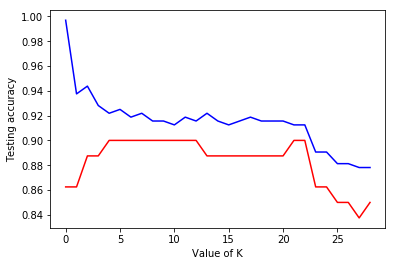

In [42]:

scores = []
scores_train = []
for i in range(1,30):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,Y_train)
    Y_predict = Knn.predict(X_test)
    Y_predict_train = Knn.predict(X_train)
    scores.append(accuracy_score(Y_predict,Y_test))
    scores_train.append(accuracy_score(Y_predict_train,Y_train))
plt.plot(scores,color="r")
plt.plot(scores_train,color="b")
plt.xlabel("Value of K")
plt.ylabel("Testing accuracy")
plt.show()
    

In [36]:
X.head()

,Age,EstimatedSalary,Gender
0,0.023810,0.029630,1
1,0.404762,0.037037,1
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,1


In [37]:
Y[0].value_counts()

0    257
1    143
Name: 0, dtype: int64

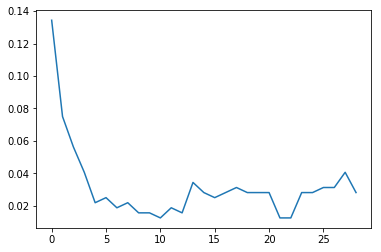

In [38]:
plt.plot(np.subtract(scores_train,scores))

In [39]:
haha= np.subtract(scores_train,scores)

In [40]:
np.argmin(haha)

10